In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import urllib.request
import os

print("All imports successful!")
print(f"Current directory: {os.getcwd()}")

All imports successful!
Current directory: C:\Users\User\Projects\Multi-Task-ADAS-System\notebooks


In [5]:
print("Loading YOLOv8 nano model...")
model = YOLO("yolov8n.pt")
print("YOLOv8 nano model loaded successfully!")
print(f"Model can detect {len(model.names)} different classes")
print("\nSample classes revlevant to ADAS:")
print(" - car (class 2)")
print("  - motorcycle (class 3)")
print("  - bus (class 5)")
print("  - truck (class 7)")
print("  - person (class 0)")
print("  - traffic light (class 9)")
print("  - stop sign (class 11)")

Loading YOLOv8 nano model...
YOLOv8 nano model loaded successfully!
Model can detect 80 different classes

Sample classes revlevant to ADAS:
 - car (class 2)
  - motorcycle (class 3)
  - bus (class 5)
  - truck (class 7)
  - person (class 0)
  - traffic light (class 9)
  - stop sign (class 11)


Dowloading Image...


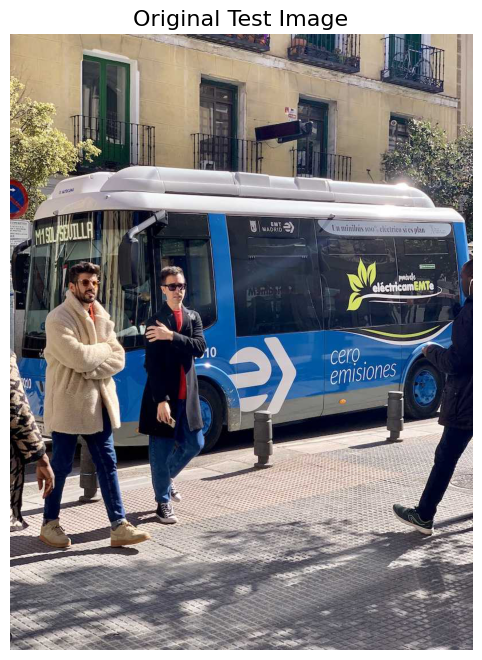

Image dowloaded and displayed!
Image size: (810, 1080)


In [6]:
os.makedirs("test_images", exist_ok=True)
image_url = "https://ultralytics.com/images/bus.jpg"
print("Dowloading Image...")
urllib.request.urlretrieve(image_url, "test_images/sample.jpg")
img = Image.open("test_images/sample.jpg")
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis("off")
plt.title("Original Test Image", fontsize=16)
plt.show()

print(f"Image dowloaded and displayed!")
print(f"Image size: {img.size}")

In [7]:
print("Running object detection...")
results = model("test_images/sample.jpg")
print("Detectio complete!")
print(f"Number of objects detected: {len(results[0].boxes)}")

Running object detection...

image 1/1 C:\Users\User\Projects\Multi-Task-ADAS-System\notebooks\test_images\sample.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 99.9ms
Speed: 2.8ms preprocess, 99.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)
Detectio complete!
Number of objects detected: 6


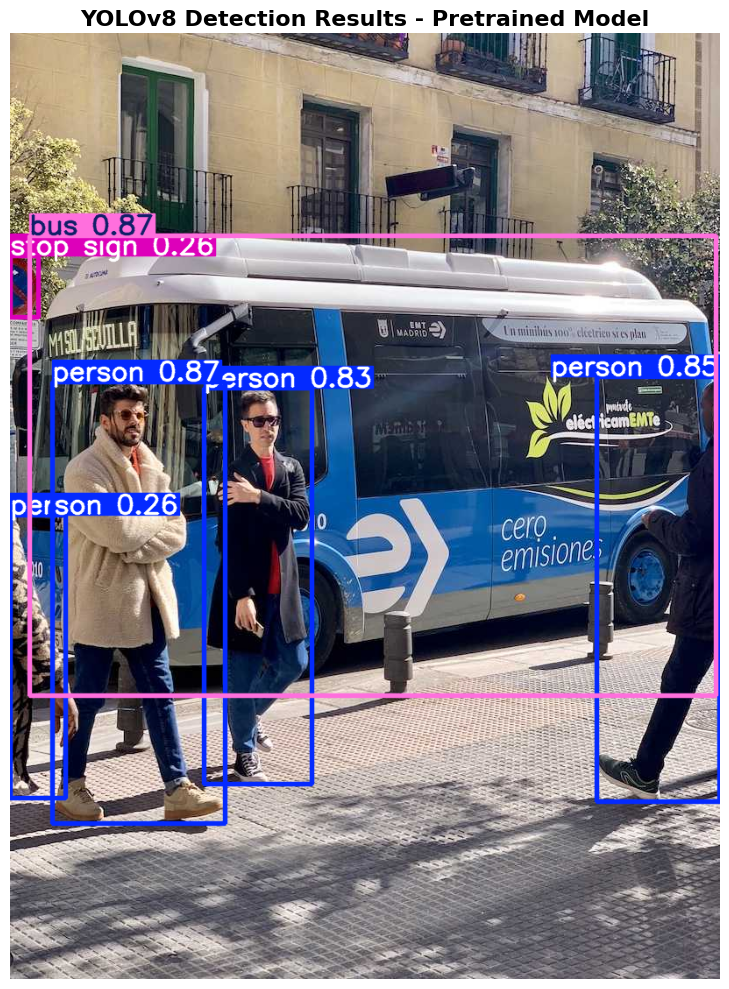

Detection visualization displayed!


In [8]:
annotated_img = results[0].plot()
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14,10))
plt.imshow(annotated_img_rgb)
plt.axis("off")
plt.title("YOLOv8 Detection Results - Pretrained Model", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()
print("Detection visualization displayed!")

In [9]:
boxes = results[0].boxes
print("Detection Details")
for i, box in enumerate(boxes):
    x1,y1,x2,y2 = box.xyxy[0].cpu().numpy()
    confidence = box.conf[0].cpu().numpy()
    class_id = int(box.cls[0].cpu().numpy())
    class_name = model.names[class_id]
    width = x2 - x1
    height = y2 - y1

    print(f"\n Object {i+1}:")
    print(f"  Class: {class_name.upper()}")
    print(f"  Confidence: {confidence:.2%}")
    print(f"  Bounding Box: ({x1:.0f}, {y1:.0f} -> ({x2:.0f}, {y2:.0f})")
    print(f"  Size: {width:.0f}x{height:.0f} pixels")

Detection Details

 Object 1:
  Class: BUS
  Confidence: 87.34%
  Bounding Box: (23, 231 -> (805, 757)
  Size: 782x526 pixels

 Object 2:
  Class: PERSON
  Confidence: 86.57%
  Bounding Box: (49, 399 -> (245, 903)
  Size: 197x504 pixels

 Object 3:
  Class: PERSON
  Confidence: 85.28%
  Bounding Box: (669, 392 -> (810, 877)
  Size: 140x485 pixels

 Object 4:
  Class: PERSON
  Confidence: 82.52%
  Bounding Box: (222, 406 -> (345, 858)
  Size: 123x452 pixels

 Object 5:
  Class: PERSON
  Confidence: 26.11%
  Bounding Box: (0, 551 -> (63, 873)
  Size: 63x323 pixels

 Object 6:
  Class: STOP SIGN
  Confidence: 25.51%
  Bounding Box: (0, 254 -> (33, 325)
  Size: 32x70 pixels



image 1/1 C:\Users\User\Projects\Multi-Task-ADAS-System\notebooks\test_images\sports_scene.jpg: 384x640 2 persons, 1 tie, 72.8ms
Speed: 3.2ms preprocess, 72.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\User\Projects\Multi-Task-ADAS-System\notebooks\test_images\street_scene.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 59.1ms
Speed: 4.7ms preprocess, 59.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


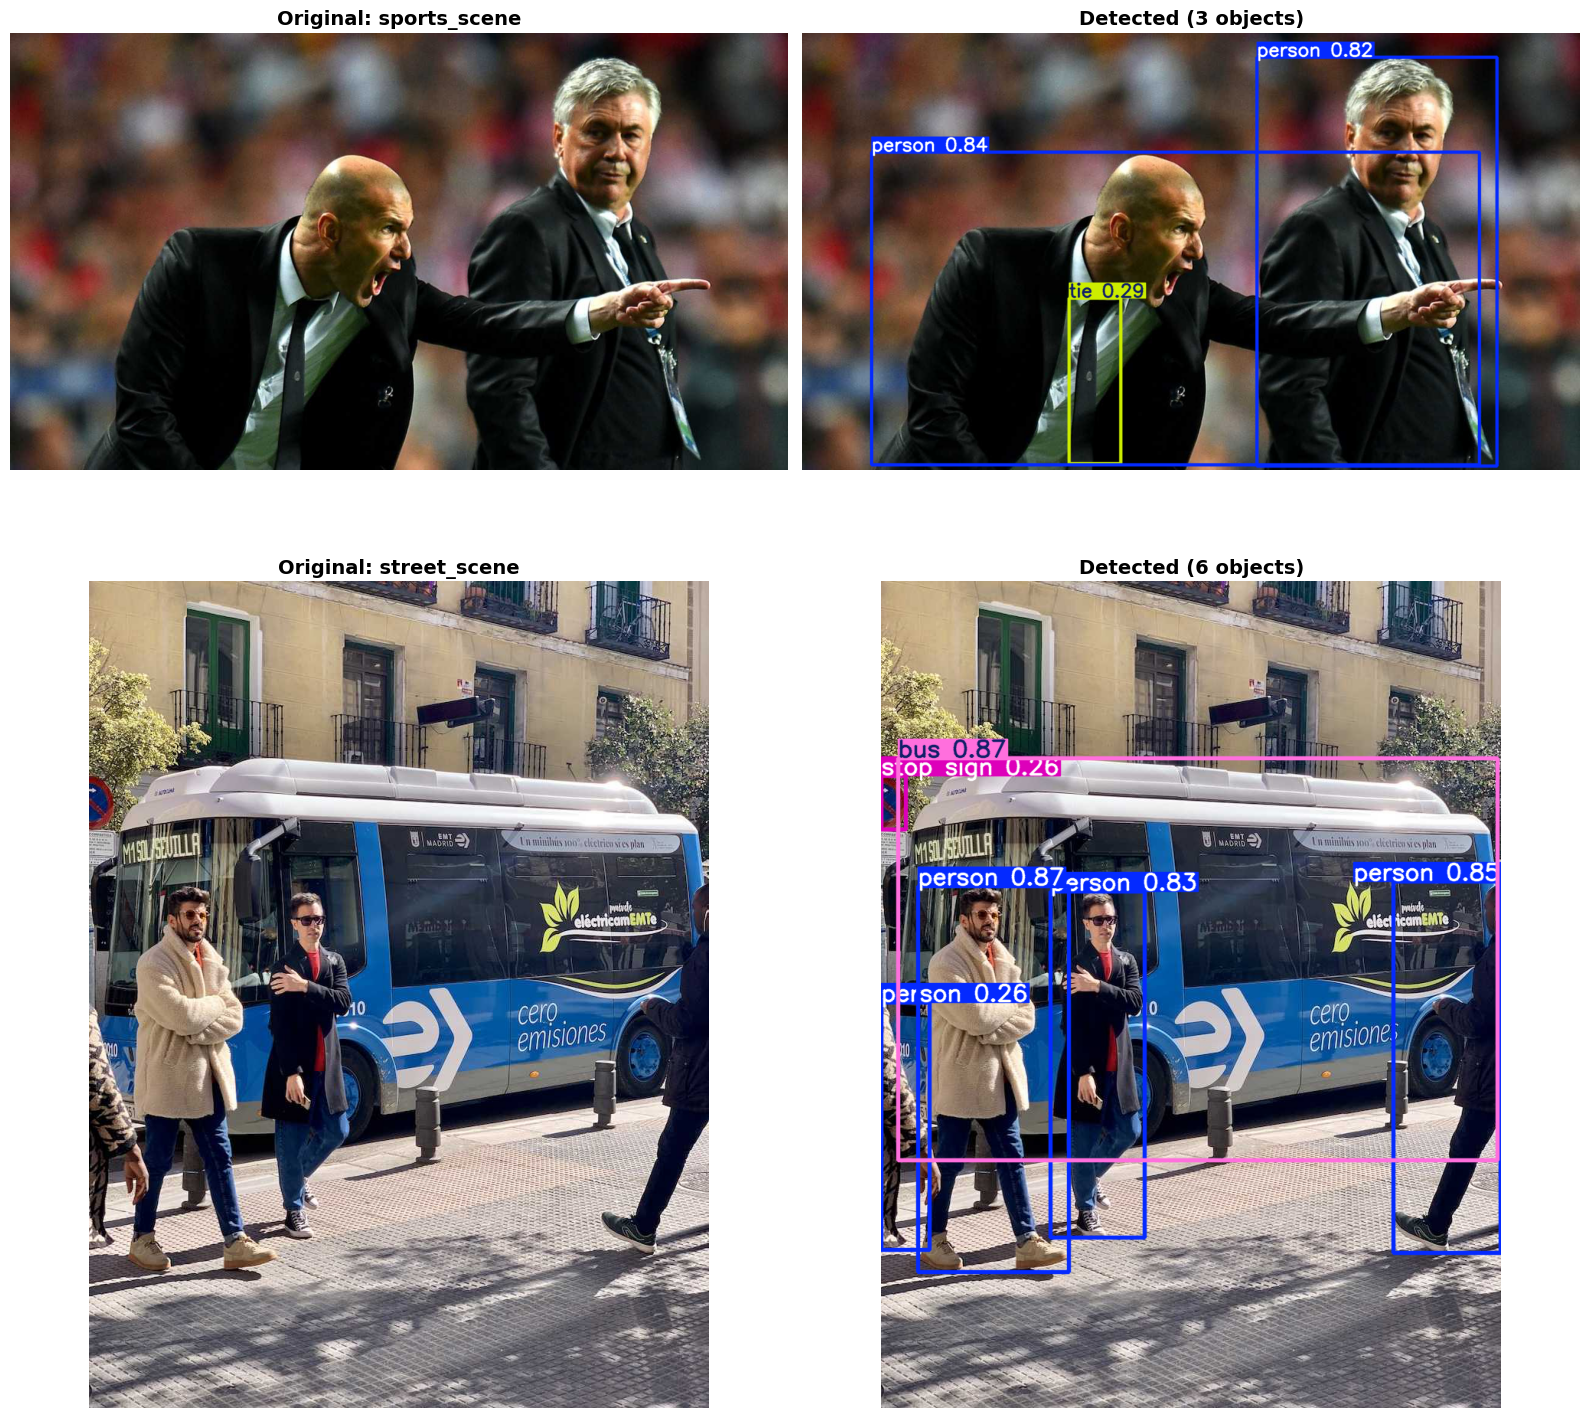

Mutilple image detection complete!


In [10]:
image_urls = [
    ("https://ultralytics.com/images/zidane.jpg", "sports_scene"),
    ("https://ultralytics.com/images/bus.jpg", "street_scene"),
]
fig, axes = plt.subplots(len(image_urls), 2, figsize=(16, 8*len(image_urls))) #row,col,figsize
for i, (url, name) in enumerate(image_urls):
    img_path = f"test_images/{name}.jpg"
    urllib.request.urlretrieve(url, img_path)

    results = model(img_path)

    axes[i,0].imshow(Image.open(img_path))
    axes[i,0].set_title(f"Original: {name}", fontsize=14, fontweight="bold")
    axes[i, 0].axis("off")

    annotated = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)
    axes[i,1].imshow(annotated)
    axes[i, 1].set_title(f"Detected ({len(results[0].boxes)} objects)", fontsize=14, fontweight='bold')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
print("Mutilple image detection complete!")

In [13]:
ADAS_CLASSES = {
    0: 'person',
    2: 'car',
    3: 'motorcycle',
    5: 'bus',
    7: 'truck',
    9: 'traffic light',
    11: 'stop sign',
}

print("ADAS-Relevant Detections Only:")

boxes = results[0].boxes
adas_detections = 0

for box in boxes:
    class_id = int(box.cls[0].cpu().numpy())
    
    if class_id in ADAS_CLASSES:
        adas_detections += 1
        confidence = box.conf[0].cpu().numpy()
        class_name = ADAS_CLASSES[class_id]
        
        print(f" {class_name.upper()}: {confidence:.2%} confidence")

print(f"\nTotal ADAS-relevant objects: {adas_detections}/{len(boxes)}")

ADAS-Relevant Detections Only:
 BUS: 87.34% confidence
 PERSON: 86.57% confidence
 PERSON: 85.28% confidence
 PERSON: 82.52% confidence
 PERSON: 26.11% confidence
 STOP SIGN: 25.51% confidence

Total ADAS-relevant objects: 6/6
